# Цель Работы
Основная цель данной лабораторной работы - рассмотреть работу алгоритма нечеткой кластеризации Густафсона-Кесселя (англ. Gustafson-Kessel, сокращенно GK) в сравнении с алгоритмом нечёткой кластеризации C-средних (англ. Fuzzy C-means Algorithm, сокращенно CM) и сделать выводы относительно алгоритмов на основе полученных результатов.


# Ход Работы

Для работы с алгоритмами нечеткой кластеризации в этом проекте будет использован пакет языка R под названием advclust.
Этот пакет содержит несколько нечетких методов кластеризации, включая и необходимые нам методы CM и GK.

В самом начале, загрузим необходимые нам пакеты R и сам датасет iris:

In [1]:
library(datasets) # загружаем пакет стандартных датасетов
data(iris) # загружаем датасет iris 
library(advclust) # загружаем пакет для работы с нечеткими методами кластеризации

Отобразим первые строки датасета iris, чтобы понять, какие данные и значения он содержит:

In [2]:
head(iris) # отобразить первые строки датасета

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Так как задача кластеризации относится к группе задач обучения без учителя, то входные данные разобьем на 2 отдельных датасета:
- iris.input - матрица, содержащая 4 колонки характеристик
- iris.class - вектор, содержащий реальные значения вида цветов ириса (будем использовать для сравнения результатов)

In [3]:
iris.input<-iris[,1:4]
iris.class<-iris[,"Species"]

## Aлгоритм нечёткой кластеризации C-средних (C-Means)
Aлгоритм нечёткой кластеризации C-средних позволяет разбить имеющееся множество элементов мощностью N на заданное число нечётких множеств K. Этот метод можно рассматривать как усовершенствованный метод k-средних, при котором для каждого элемента из рассматриваемого множества рассчитывается степень его принадлежности каждому из кластеров. 

Fuzzy c-means алгоритм представляет собой итеративное исполнение шагов, на каждом из которых формируется нечеткое разбиение входного множества объектов на заданное количество кластеров, которые характеризуются совокупностью функций принадлежности, и для для нового нечеткого разбиения рассчитываются центры нечетких кластеров и значения целевой функции.

Воспользуемся функцией fuzzy.CM() пакета advclust. Она имеет следующие параметры:
- X - матрица наблюдений;
- K - наперед заданное количество кластеров;
- m - параметр фуззификации (степень размытия границ между кластерами);
- max.iteration - максимальное количество итераций
- threshold - порог чувсвительности изменения положений центроидов;
- RandomNumber - необязательный параметр, отвечающий за инициализацию нечеткого разбиения на первой итерации

Выполним разбиение имеющегося множества на 3 кластера методом нечёткой кластеризации C-средних и посмотрим на результат выполнения метода:

In [4]:
fuzzy.CM(X=iris.input, K=3, m=2, 
         max.iteration=100, threshold=1e-5, 
         RandomNumber=1234)->cl_CM

show(cl_CM)


Membership initialiazed randomly

 iteration:	 28
Finish :)
Function call: fuzzy.CM(X = iris.input, K = 3, m = 2, max.iteration = 100, threshold = 1e-05,  Function call:     RandomNumber = 1234)
Fuzzy C-Means
Function objective: 60.5057106345492
Membership & Label Matrix:

|        | Cluster 1| Cluster 2| Cluster 3| Label|
|:-------|---------:|---------:|---------:|-----:|
|Obs 1   |     0.002|     0.997|     0.001|     2|
|Obs 2   |     0.017|     0.976|     0.007|     2|
|Obs 3   |     0.014|     0.980|     0.006|     2|
|Obs 4   |     0.022|     0.967|     0.010|     2|
|Obs 5   |     0.004|     0.994|     0.002|     2|
|Obs 6   |     0.045|     0.935|     0.021|     2|
|Obs 7   |     0.014|     0.979|     0.007|     2|
|Obs 8   |     0.000|     1.000|     0.000|     2|
|Obs 9   |     0.048|     0.930|     0.022|     2|
|Obs 10  |     0.012|     0.983|     0.005|     2|
|Obs 11  |     0.022|     0.968|     0.010|     2|
|Obs 12  |     0.005|     0.992|     0.002|     2|
|Obs 13  | 

## Aлгоритм Густафсона-Кесселя (Gustafson-Kessel)

Aлгоритм нечеткой кластеризации Густафсона-Кесселя совершенствует алгоритмом нечёткой кластеризации C-средних, используя адаптивную норму расстояния для каждого кластера (то есть решение задачи вычисления оптимального размещения центров также происходит путем многократного пересчета коэффициентов принадлежности и координат центров, но с учетом масштабирования при рассчете расстояний). Это позволяет использовать алгоритм Густафсона-Кесселя для подсчета кластеров не только сферической, но и эллипсоидной формы.

Воспользуемся функцией fuzzy.GK() пакета advclust. Она имеет следующие параметры:
- X - матрица наблюдений;
- K - наперед заданное количество кластеров;
- m - параметр фуззификации (степень размытия границ между кластерами);
- max.iteration - максимальное количество итераций
- threshold - порог чувсвительности изменения положений центроидов;
- RandomNumber - необязательный параметр, отвечающий за инициализацию нечеткого разбиения на первой итерации

Выполним разбиение имеющегося множества на 3 кластера методом Густафсона-Кесселя, используя те же самые значения параметров, и посмотрим на результат выполнения метода:

In [5]:
fuzzy.GK(X=iris.input, K = 3, m = 2, 
         max.iteration=100, threshold=1e-5,
         RandomNumber = 1234)->cl_GK

show(cl_GK)

Default Gamma (0) will be used
Default rho will be used

Membership initialiazed randomly

 iteration:	 100
Finish :)
Function call: fuzzy.GK(X = iris.input, K = 3, m = 2, max.iteration = 100, threshold = 1e-05,  Function call:     RandomNumber = 1234)
Gustafson Kessel Clustering
Function objective: 31.5266810711856
Membership & Label Matrix:

|        | Cluster 1| Cluster 2| Cluster 3| Label|
|:-------|---------:|---------:|---------:|-----:|
|Obs 1   |     0.004|     0.995|     0.001|     2|
|Obs 2   |     0.032|     0.957|     0.011|     2|
|Obs 3   |     0.015|     0.979|     0.005|     2|
|Obs 4   |     0.024|     0.967|     0.009|     2|
|Obs 5   |     0.006|     0.992|     0.002|     2|
|Obs 6   |     0.027|     0.962|     0.011|     2|
|Obs 7   |     0.041|     0.944|     0.015|     2|
|Obs 8   |     0.003|     0.995|     0.001|     2|
|Obs 9   |     0.051|     0.932|     0.017|     2|
|Obs 10  |     0.037|     0.948|     0.015|     2|
|Obs 11  |     0.015|     0.979|     0.006

## Исследование полученных результатов и сравнение их с истинными значениями


Итак, количество наблюдений в каждом кластере в результате нечёткой кластеризации C-средних следующее:

In [6]:
table(cl_CM@hard.label)


 1  2  3 
60 50 40 

В то время, как как количество элементов в каждом кластере для второго алгоритма:

In [7]:
table(cl_GK@hard.label)


 1  2  3 
59 50 41 

Рассмотрим, как именно распределились подсчитанные значения кластеров в сравнении с настоящими значениями вида ирисов:

In [8]:
# Для алгоритма с-средних:
table(iris.class, cl_CM@hard.label)

            
iris.class    1  2  3
  setosa      0 50  0
  versicolor 47  0  3
  virginica  13  0 37

In [9]:
# Для алгоритма Густафсона-Кесселя:
table(iris.class, cl_GK@hard.label)

            
iris.class    1  2  3
  setosa      0 50  0
  versicolor 47  0  3
  virginica  12  0 38

Как видно из результатов выше, нечеткая кластеризация методом Густафсона-Кесселя дала чуть более аккуратное разбиение на кластеры в сравнении с методом с-средних. 

## Визуализация результатов
Для визуализации результатов нечеткого кластерного анализа, в выбранном пакете есть удобные функции biploting и radar.plotting. 

Начнем с визуализации расчитанных кластеров при помощи метода biploting (который использует PCA для определения основных компонент прежде, чем визуализировать кластеры):

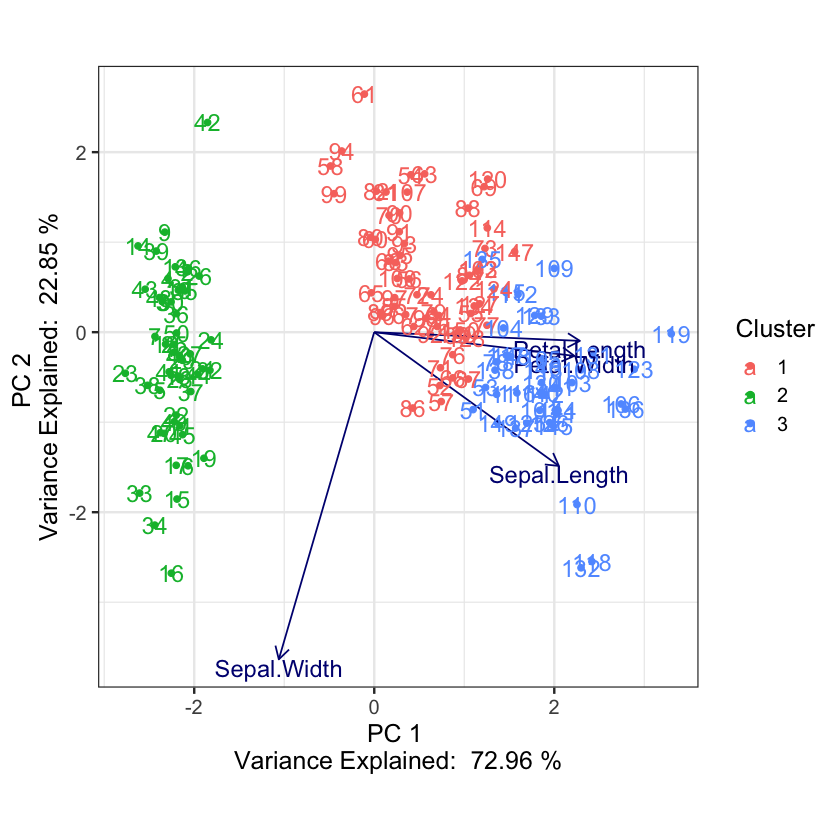

In [10]:
# Двумерная визуализация кластеров, полученных методом нечёткой кластеризации C-средних
biploting(cl_CM, iris.input, scale=T) -> biplot_CM

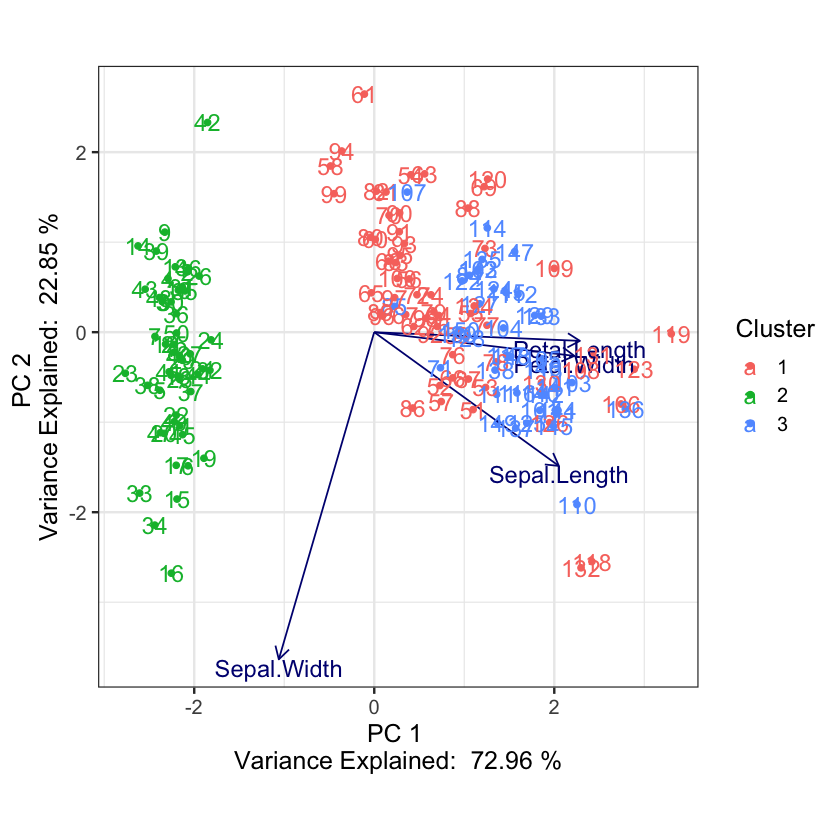

In [11]:
# Двумерная визуализация кластеров, полученных методом нечёткой кластеризации Густафсона-Кесселя
biploting(cl_GK, iris.input, scale=T) -> biplot_GK

Построим также радиальные диаграммы для результатов обоих алгоритмов. 

В радиальных диаграммах, каждой переменной присваивается ось, имеющая начало в центре. Все оси располагаются радиально с одинаковым промежутком между друг другом, при этом на всех осях используется одинаковая шкала. Сеточные линии, которые соединяют оси между собой, зачастую используются в качестве ориентира

Для функции radar.plotting ниже
- значение 0 - соответствует среднему арифметическому для рассмариваемой переменной; 
- 0.5 - среднее арифметическое плюс половина стандартного отклонения настоящих значений переменной;
- -0.5 - среднее арифметическое минус половина стандартного отклонения настоящих значений переменной; и т.д.

Using Cluster as id variables



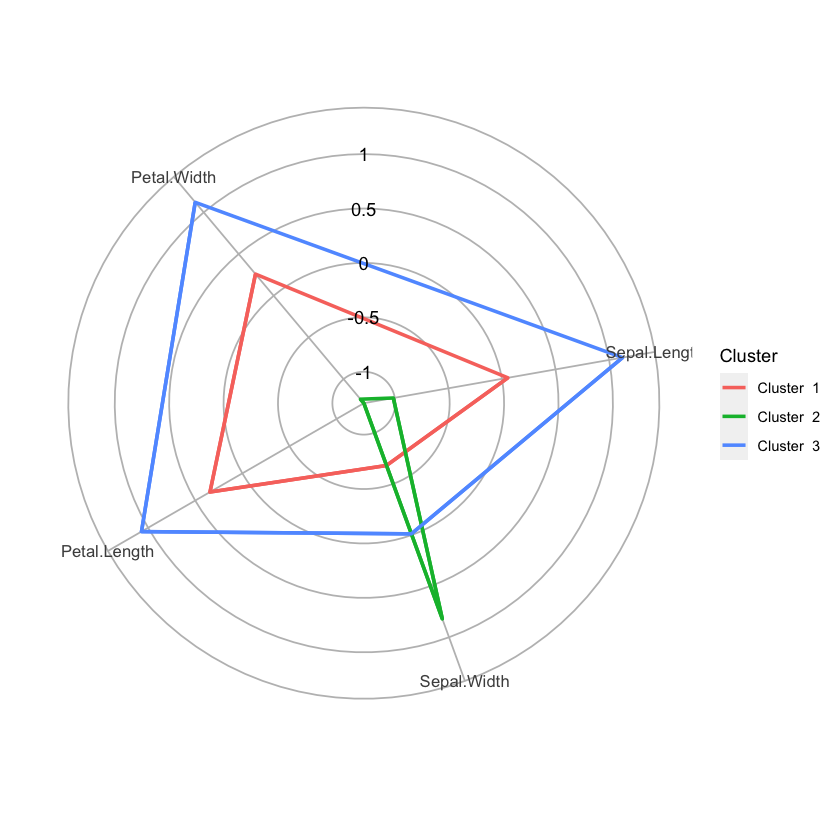

In [12]:
# Радиальная диаграмма для кластеров, полученных методом нечёткой кластеризации C-средних
radar.plotting(cl_CM, iris.input)->radar_CM

Using Cluster as id variables



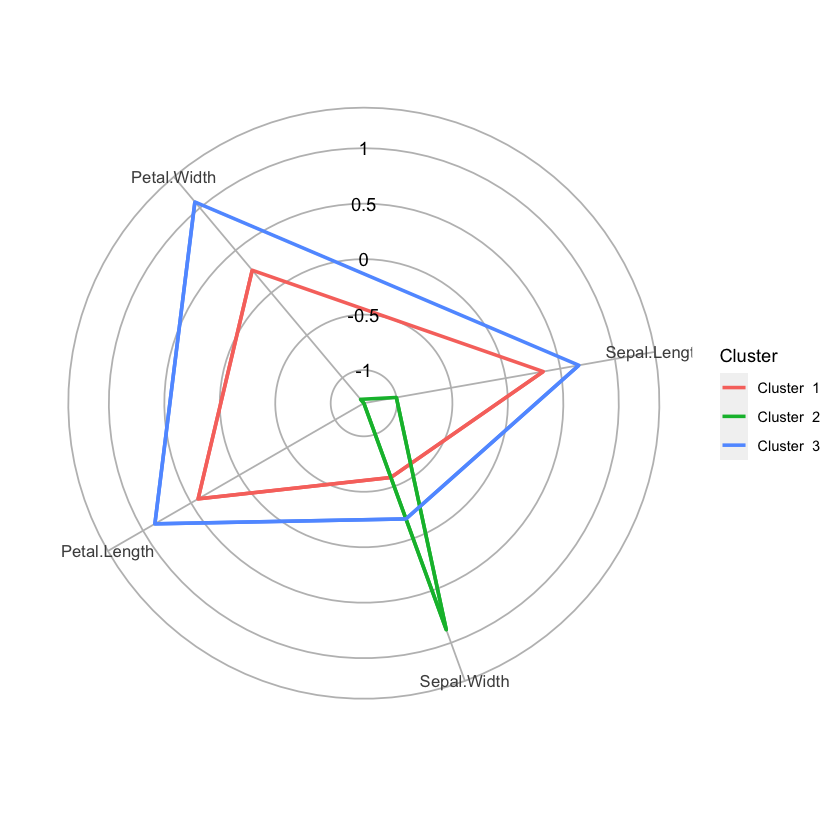

In [13]:
# Радиальная диаграмма для кластеров, полученных методом нечёткой кластеризации Густафсона-Кесселя
radar.plotting(cl_GK, iris.input)->radar_GK

Используем еще один способ визуализации кластеров в языке R, где на предварительном шаге также используется PCA алгоритм, но хорошо видны границы кластеров:

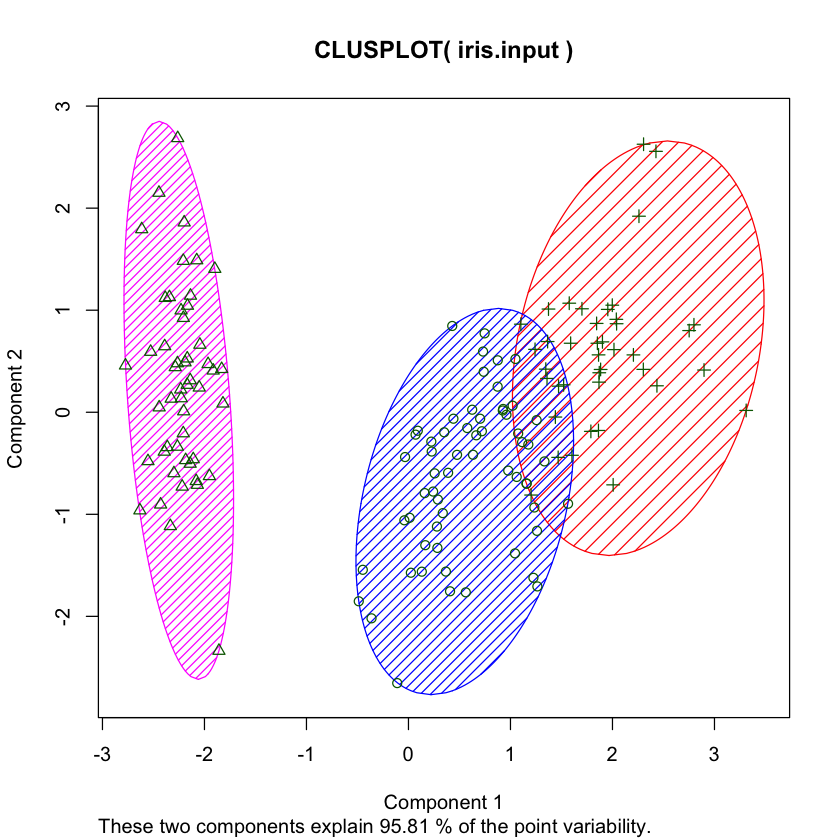

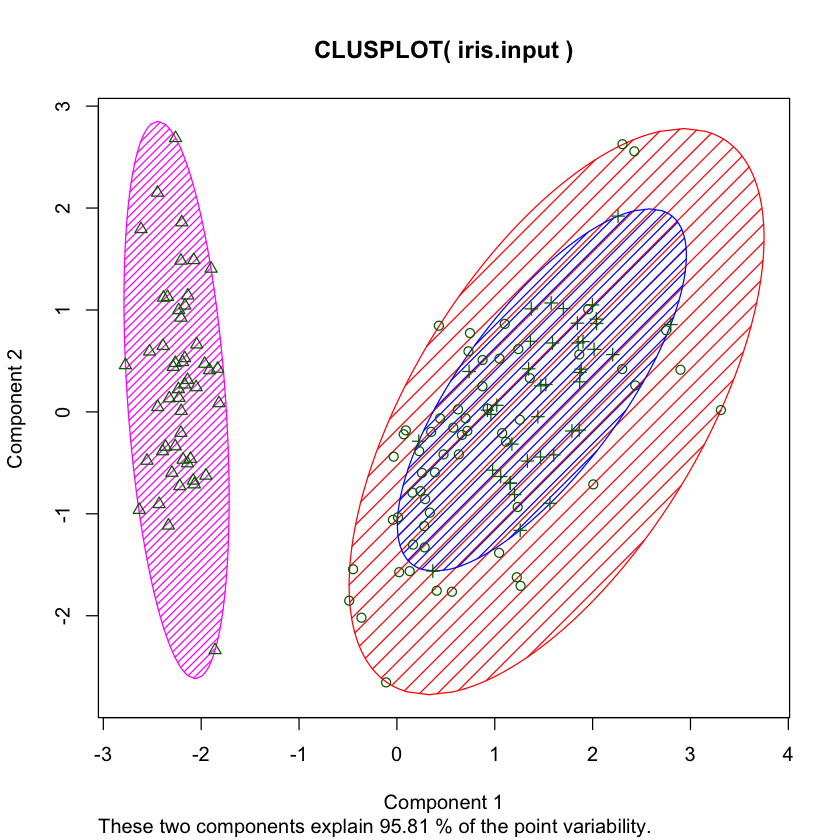

In [14]:
library(cluster)
clusplot(x=iris.input, clus=cl_CM@hard.label, color=T, shade=T, labels=0, lines=0)
clusplot(x=iris.input, clus=cl_GK@hard.label, color=T, shade=T, labels=0, lines=0)

# Выводы
В ходе работы над проектом была рассмотрена работа алгоритма нечеткой кластеризации Густафсона-Кесселя в сравнении с алгоритмом нечёткой кластеризации C-средних. 

Оба рассмотренных алгоритма представляют собой решение задачи оптимального размещения центров путем многократного пересчета коэффициентов принадлежности и координат центров, но в методе Густафсона-Кесселя при рассчете расстояний учитывается масштабирование.

Даже со стандартным датасетом iris, котрый содержит всего 150 наблюдений, нечеткая кластеризация методом Густафсона-Кесселя дала чуть более аккуратное разбиение на кластеры в сравнении с методом с-средних (и с учетом того, что нам известно настоящее разбиение наблюдений на кластеры).